In [1]:
import numpy as np
from lib import plot
from lib.cs_noise import noise2d
from copy import deepcopy
import IPython

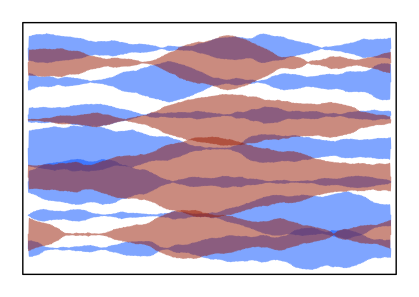

In [2]:
paper = deepcopy(plot.A6_LANDSCAPE)

p_svg = plot.SVGPlotter('plots/hf.svg', paper)
p_hpgl = plot.HPGLPlotter(paper, 'plots/hf_{index}.hpgl')
plotter = plot.MultiPlotter()
plotter.register_plotter(p_svg)
plotter.register_plotter(p_hpgl)

plotter.draw_frame()

def add_lines(plotter, lines):
    FREQUENCY = 2
    X_OVERSAMPLING = 8
    REL_AMPLITUDE = 1.4
    REL_Y_MARGIN = 0.6

    line_height = paper.content_height / (lines - 1 + 2 * REL_Y_MARGIN)
    x_steps = round(paper.content_width * FREQUENCY * X_OVERSAMPLING) + 1
    texture = noise2d(x_steps, x_steps)
    texture = texture[::(x_steps // lines), :]
    texture /= np.max(np.abs(texture))

    for i in range(lines):
        y = paper.top() + (i + REL_Y_MARGIN) * line_height
        plotter.move_to((paper.left(), y))

        # for x in np.linspace(paper.left(), paper.right(), x_steps):
        for j in range(x_steps):
            x = paper.left() + j / (x_steps - 1) * paper.content_width
            amplitude = line_height * REL_AMPLITUDE * texture[i, j]
            plotter.line_to((x, y + amplitude / 2 * np.sin(x * FREQUENCY * 2 * np.pi)))

paper.set_margins(10)
plotter.add_layer([0, 0.3, 1, 0.5])
add_lines(plotter, 7)
plotter.add_layer([0.6, 0.1, 0, 0.5])
add_lines(plotter, 4)

plotter.finalise()
IPython.display.SVG(filename=p_svg.file_name)